In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
# import country_converter as coco

In [13]:
df = pd.read_csv(r"C:\Users\simbi\Ironhack\Proyecto\datos_proyecto\attacks.csv", encoding ="unicode_escape")

#df = pd.read_csv(r"C:\Users\nuc_humbertore\Ironhack\primer_proyecto_DAPT\datos_proyecto\attacks.csv", encoding ="unicode_escape")

# Limpieza de los datos


## 2.1 limpiar columnas de espacios

In [14]:
# limpiar columnas de espacios

columnas = df.columns
columnas = map(lambda x: x.strip(), columnas)
df.columns = columnas
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

## 2.2 identificar y eliminar las columnas inservibles

In [15]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [16]:
#Después de una exploración del df borramos las columnas
#con datos no numéricos y que no se pueden categorizar 
#P. ej.enlaces y códigos repetidos y columnas basura sin datos

In [17]:
df.drop(['pdf', 'href formula', 'href','Name','Injury','Species','Investigator or Source',
       'Case Number.1', 'Case Number.2','Unnamed: 22','Unnamed: 23'], axis= 1, inplace=True)

In [18]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Sex', 'Age', 'Fatal (Y/N)', 'Time', 'original order'],
      dtype='object')

## 2.2 filas

In [19]:

"""
No funciona

def trim_all_columns(df):
    
    # Trim whitespace from ends of each value across all series in dataframe
    
    trim_strings = lambda x: x.strip() if isinstance(x, str) else x
    return df.applymap(trim_strings)

trim_all_columns(df)

"""

'\nNo funciona\n\ndef trim_all_columns(df):\n    \n    # Trim whitespace from ends of each value across all series in dataframe\n    \n    trim_strings = lambda x: x.strip() if isinstance(x, str) else x\n    return df.applymap(trim_strings)\n\ntrim_all_columns(df)\n\n'

## Borramos todas las filas con 100% de Nan

In [20]:
df.dropna(how='all',inplace = True)

In [21]:
# para comprobar cuantos nulos hay por fila y listar los 10 que tienen más

nulos = df.isnull().sum(axis=1)
nulos.sort_values(ascending = False).head(10).index
nul = nulos.sort_values(ascending = False).head(10).index
list(nul)

[25722, 7124, 7122, 7121, 7120, 7119, 7118, 7117, 7116, 7115]

## borramos los filas con menos de 5 valores que no son Null


In [22]:
#borramos los filas con menos de 10 valores que no son Null

df.dropna(thresh=5, inplace=True)

In [23]:
df.shape

(6302, 13)

In [24]:
df.tail(3)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Fatal (Y/N),Time,original order
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,M,NaN,Y,NaN,4.0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,M,NaN,Y,NaN,3.0
6301,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,M,15,Y,NaN,2.0


# 3 Dar formato a los datos

## Nornalizar columna "Fatal (Y/N)"

In [25]:
df["Fatal (Y/N)"].unique()

array(['N', 'Y', nan, 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y'],
      dtype=object)

In [26]:
#Eliminamos espacios
df["Fatal (Y/N)"] = df["Fatal (Y/N)"].str.strip(to_strip=None)

#lo pasamos todo a minúsculas
df["Fatal (Y/N)"]=df["Fatal (Y/N)"].str.lower()

#dejamos los "n" y los "y" y transformamos el resto en "notknown"
df.loc[(df.loc[:, "Fatal (Y/N)"] != "n") & (df.loc[:, "Fatal (Y/N)"] != "y")] = "notknown"

In [27]:
df["Fatal (Y/N)"].unique()

array(['n', 'y', 'notknown'], dtype=object)

## Nornalizar columna "Sex"

In [28]:
df["Sex"].unique()

array(['F', 'M', 'notknown', nan, 'M ', 'lli', 'N', '.'], dtype=object)

In [47]:
#Eliminamos espacios
df["Sex"] = df["Sex"].str.strip(to_strip=None)

#lo pasamos todo a minúsculas
df["Sex"]=df["Sex"].str.lower()

#dejamos las "f" y las "m" y transformamos el resto en "notknown"
df.loc[(df.loc[:, 'Sex'] != "f") & (df.loc[:, 'Sex'] != "m")] = "notknown"

In [48]:
df["Sex"].unique()

array(['f', 'm', 'notknown'], dtype=object)

## Normalizar columna Age a int or float

In [49]:
df["Age"] = df.Age.str.strip()

In [50]:
df["Age_normalize"] = pd.to_numeric(df['Age'], errors='coerce', downcast="integer")

In [51]:
df["Age_normalize"].fillna(value = 0, inplace=True)

In [52]:
df["Age_normalize"] = df["Age_normalize"].astype(int)

In [53]:
df["Age_normalize"].unique()

array([57, 11, 48,  0, 18, 52, 15, 12, 32, 10, 21, 34, 30, 60, 33, 29, 54,
       41, 37, 56, 19, 25, 69, 38, 55, 35, 46, 45, 14, 28, 20, 24, 26, 49,
       22,  7, 31, 17, 40, 13, 42,  3, 50, 16, 82, 73, 51, 39, 58, 47, 61,
       65, 36, 66, 43,  9, 72, 59,  6, 64, 23, 71, 44, 27, 62, 68, 63, 70,
       53,  8, 77, 74,  5, 86, 84, 87, 75,  1, 81, 78])

In [139]:
edad = df[df["Age_normalize"] > 0]

array([[<AxesSubplot:title={'center':'Age_normalize'}>,
        <AxesSubplot:title={'center':'Date_normalize'}>],
       [<AxesSubplot:title={'center':'Year_Date'}>,
        <AxesSubplot:title={'center':'Month_Date'}>]], dtype=object)

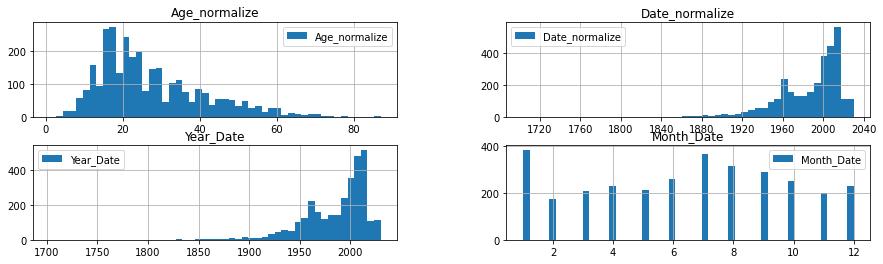

In [140]:
df[df["Age_normalize"] > 0].hist(legend=True,bins=50, figsize = [15,4])

<AxesSubplot:>

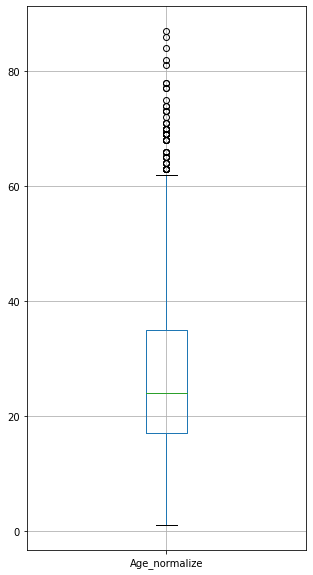

In [55]:
df[df["Age_normalize"] > 0].boxplot(figsize=(5,10))

In [56]:
df[df["Age_normalize"] > 0].describe()

,Age_normalize
count,3112.000000
mean,27.287918
std,13.827193
min,1.000000
25%,17.000000
50%,24.000000
75%,35.000000
max,87.000000


## Normalizar columna Date a datetime

In [57]:
"""
Para normalizar las fechas rellenamos los NaN con una fecha futura para 
después poder excluirla facilmente a la hora de trabajr con los datos
de esa columna

Exclude_date= "2030-01-01 00:00:00"

"""

'\nPara normalizar las fechas rellenamos los NaN con una fecha futura para \ndespués poder excluirla facilmente a la hora de trabajr con los datos\nde esa columna\n\nExclude_date= "2030-01-01 00:00:00"\n\n'

In [58]:
df['Date'].isnull().sum()

0

In [59]:
df['Date']

0       25-Jun-2018
1       18-Jun-2018
2       09-Jun-2018
3       08-Jun-2018
4       04-Jun-2018
           ...     
6297    Before 1903
6298    Before 1903
6299      1900-1905
6300      1883-1889
6301      1845-1853
Name: Date, Length: 6302, dtype: object

In [60]:
#convertimos Date a datetime para la columna 'Date_normalize'

df['Date_normalize'] = pd.to_datetime(df['Date'], errors ='coerce')

In [61]:
df['Date_normalize'].isnull().sum()

1728

In [62]:
df['Date_normalize'].dtypes

dtype('<M8[ns]')

In [63]:
# Rellenanos los Nan con una fecha rara para poder filtrar luego. 
# OJO! esto convierte toda la columna en float
Exclude_date = "2030-01-01 00:00:00"
df['Date_normalize'].fillna(value = Exclude_date , inplace=True)

In [64]:
df['Date_normalize']

0      2018-06-25
1      2018-06-18
2      2018-06-09
3      2018-06-08
4      2018-06-04
          ...    
6297   2030-01-01
6298   2030-01-01
6299   2030-01-01
6300   2030-01-01
6301   2030-01-01
Name: Date_normalize, Length: 6302, dtype: datetime64[ns]

In [65]:
df['Date_normalize'].isnull().sum()

0

In [66]:
df['Date_normalize'].dtypes

dtype('<M8[ns]')

In [67]:
#volvemos a convertir la columna de float a datetime 
df['Date_normalize'] = pd.to_datetime(df['Date_normalize'], errors ='coerce')

In [68]:
df['Date_normalize']

0      2018-06-25
1      2018-06-18
2      2018-06-09
3      2018-06-08
4      2018-06-04
          ...    
6297   2030-01-01
6298   2030-01-01
6299   2030-01-01
6300   2030-01-01
6301   2030-01-01
Name: Date_normalize, Length: 6302, dtype: datetime64[ns]

In [70]:
df['Date_normalize'].isnull().sum()

0

In [71]:
df['Date_normalize'].dtypes

dtype('<M8[ns]')

In [72]:
df['Year_Date'] = df['Date_normalize'].dt.year

In [73]:
df['Year_Date'].isnull().sum()

0

In [74]:
df['Month_Date'] = df['Date_normalize'].dt.month

In [75]:
df['Day_Date'] = df['Date_normalize'].dt.day_name()

In [76]:
df.head(3)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Fatal (Y/N),Time,original order,Age_normalize,Date_normalize,Year_Date,Month_Date,Day_Date
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,f,57,n,18h00,6303.0,57,2018-06-25,2018,6,Monday
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,f,11,n,14h00 -15h00,6302.0,11,2018-06-18,2018,6,Monday
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,m,48,n,07h45,6301.0,48,2018-06-09,2018,6,Saturday


In [77]:
df['Type'].value_counts() 

Unprovoked      4391
notknown        1072
Provoked         510
Sea Disaster     171
Boating          100
Boat              30
Invalid           22
Questionable       2
Boatomg            1
Name: Type, dtype: int64

"""
para estudiar:
la manera en que si hay menos valores que x(en cantidad) en una columna esta pase a ser "undefined"
o algo por el estilo. p ej en "Type" aparee Boatomg que es un error de tiping o Questionable que solo hay 2 valores 
"""

In [78]:

"""


df["Country"] = coco.convert(names=df["Country"], to='name_short')
df["Country"]=df["Country"].str.lower()



"""


'\n\n\ndf["Country"] = coco.convert(names=df["Country"], to=\'name_short\')\ndf["Country"]=df["Country"].str.lower()\n\n\n\n'

In [81]:
"""


df["Country"].nunique()

"""

'\n\n\ndf["Country"].nunique()\n\n'

<AxesSubplot:>

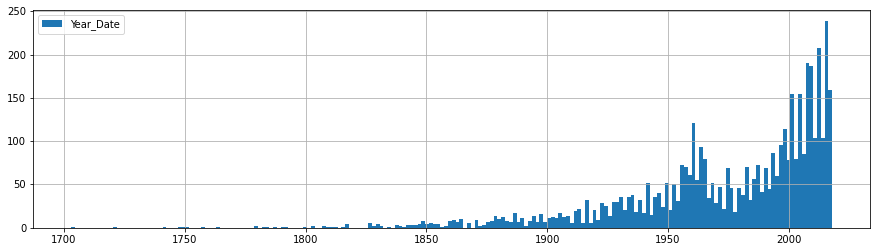

In [82]:
year_filtrado = df[(df.Year_Date < 2028)]
#year_filtrado = df[df["Year_Date"] != Exclude_date]
#Exclude_date



year_filtrado['Year_Date'].hist(legend=True,bins= 200, figsize = [15,4])

In [88]:
type(year_filtrado)

pandas.core.frame.DataFrame

In [92]:
year_filtrado.shape

(4574, 18)

In [117]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Sex', 'Age', 'Fatal (Y/N)', 'Time', 'original order',
       'Age_normalize', 'Date_normalize', 'Year_Date', 'Month_Date',
       'Day_Date'],
      dtype='object')

array([[<AxesSubplot:title={'center':'Age_normalize'}>,
        <AxesSubplot:title={'center':'Date_normalize'}>],
       [<AxesSubplot:title={'center':'Year_Date'}>,
        <AxesSubplot:title={'center':'Month_Date'}>]], dtype=object)

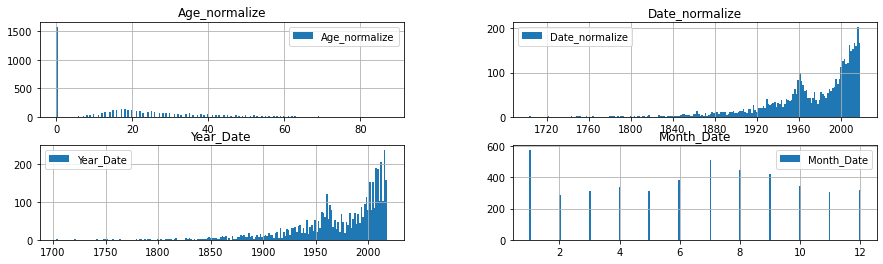

In [96]:
df[df['Year_Date'] != 2030].hist(legend=True,bins= 200, figsize = [15,4])

<AxesSubplot:>

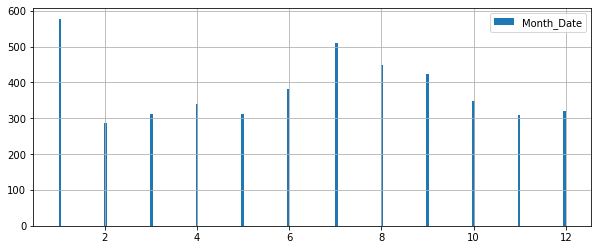

In [97]:
year_filtrado['Month_Date'].hist(legend=True,bins= 200, figsize = [10,4])


<AxesSubplot:>

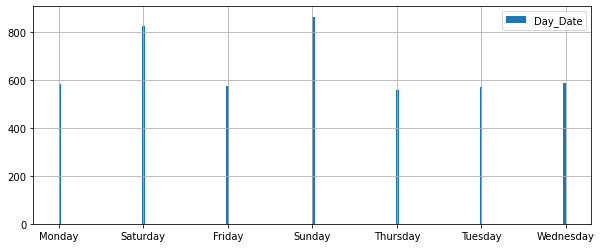

In [98]:
year_filtrado['Day_Date'].hist(legend=True,bins= 200, figsize = [10,4])

In [99]:
df.dtypes

Case Number               object
Date                      object
Year                      object
Type                      object
Country                   object
Area                      object
Location                  object
Activity                  object
Sex                       object
Age                       object
Fatal (Y/N)               object
Time                      object
original order            object
Age_normalize              int32
Date_normalize    datetime64[ns]
Year_Date                  int64
Month_Date                 int64
Day_Date                  object
dtype: object

In [100]:
type(year_filtrado)

# newdf = df[(df.Year_Date != 0)]

pandas.core.frame.DataFrame

<AxesSubplot:>

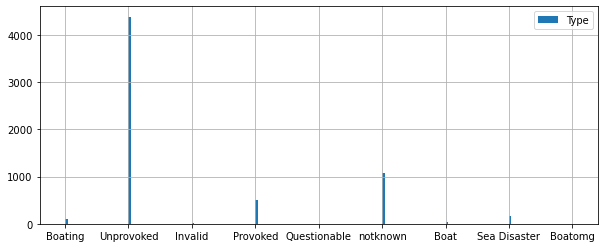

In [101]:
df['Type'].hist(legend=True,bins= 200, figsize = [10,4])

In [102]:
year_filtrado.sort_values("Year_Date", ascending=True)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Fatal (Y/N),Time,original order,Age_normalize,Date_normalize,Year_Date,Month_Date,Day_Date
6160,1703.03.26,26-Mar-1703,1703.0,Unprovoked,BARBADOS,Southwest coast,Carlisle Bay,Swimming,m,19,n,Night,143.0,19,1703-03-26,1703,3,Monday
6159,1721.06.00,June 1721,1721.0,Unprovoked,ITALY,Sardinia,"Ponte della Maddelena,",Swimming,m,NaN,y,NaN,144.0,0,1721-06-01,1721,6,Sunday
6155,1742.12.17,17-Dec-1742,1742.0,Unprovoked,NaN,NaN,Carlisle Bay,Swimming,m,NaN,y,NaN,148.0,0,1742-12-17,1742,12,Monday
6154,1748.00.00,1748,1748.0,Unprovoked,PANAMA,Las Perlas archipelago,Taboga & Isla del Rey,Pearl diving,m,NaN,y,NaN,149.0,0,1748-01-01,1748,1,Monday
6152,1749.00.00,1749,1749.0,Unprovoked,CUBA,Havana Province,Havana Harbor,Swimming,m,14,n,NaN,151.0,14,1749-01-01,1749,1,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,2018.04.14,14-Apr-2018,2018.0,Unprovoked,BAHAMAS,New Providence,Nirvana Beach,Surfing,m,NaN,n,09h30,6273.0,0,2018-04-14,2018,4,Saturday
29,2018.04.15.a,15-Apr-2018,2018.0,Unprovoked,AUSTRALIA,Western Australia,"Cobblestones, Margaret River Area",Surfing,m,37,n,08h00,6274.0,37,2018-04-15,2018,4,Sunday
28,2018.04.15.b,15-Apr-2018,2018.0,Unprovoked,AUSTRALIA,Western Australia,"Lefthanders, Margaret River Area",Surfing,m,41,n,NaN,6275.0,41,2018-04-15,2018,4,Sunday
40,2018.02.23,23-Feb-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Little Congwong Beach, La Perouse",Swimming,f,55,n,"19h00, Dusk",6263.0,55,2018-02-23,2018,2,Friday


In [103]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Sex', 'Age', 'Fatal (Y/N)', 'Time', 'original order',
       'Age_normalize', 'Date_normalize', 'Year_Date', 'Month_Date',
       'Day_Date'],
      dtype='object')

## Sacar un Df con 2 columnas


In [111]:
year_filtrado[['Year_Date','Age_normalize']].describe()

,Year_Date,Age_normalize
count,4574.000000,4574.000000
mean,1974.055969,17.911893
std,42.055267,17.164462
min,1703.000000,0.000000
25%,1955.000000,0.000000
50%,1988.000000,17.000000
75%,2007.000000,28.000000
max,2018.000000,87.000000


filtrado de columnasplot

In [105]:
#filtrar solo a los hombres
df[df["Sex"] == "m"]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Fatal (Y/N),Time,original order,Age_normalize,Date_normalize,Year_Date,Month_Date,Day_Date
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,m,48,n,07h45,6301.0,48,2018-06-09,2018,6,Saturday
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,m,NaN,n,NaN,6300.0,0,2018-06-08,2018,6,Friday
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,m,NaN,n,NaN,6299.0,0,2018-06-04,2018,6,Monday
5,2018.06.03.b,03-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,m,NaN,n,NaN,6298.0,0,2018-06-03,2018,6,Sunday
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,m,18,y,Late afternoon,6297.0,18,2018-06-03,2018,6,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,m,NaN,y,NaN,6.0,0,2030-01-01,2030,1,Tuesday
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,m,NaN,y,NaN,5.0,0,2030-01-01,2030,1,Tuesday
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,m,NaN,y,NaN,4.0,0,2030-01-01,2030,1,Tuesday
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,m,NaN,y,NaN,3.0,0,2030-01-01,2030,1,Tuesday


# pruebas


In [124]:
# df[df["Age_normalize"] > 0]

In [125]:
df['Sex'].value_counts()

m           4655
notknown    1072
f            575
Name: Sex, dtype: int64

In [141]:
df['Fatal (Y/N)'].value_counts()

n           3950
y           1280
notknown    1072
Name: Fatal (Y/N), dtype: int64

In [127]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Sex', 'Age', 'Fatal (Y/N)', 'Time', 'original order',
       'Age_normalize', 'Date_normalize', 'Year_Date', 'Month_Date',
       'Day_Date'],
      dtype='object')

In [128]:
df["Fatal (Y/N)"].value_counts()

n           3950
y           1280
notknown    1072
Name: Fatal (Y/N), dtype: int64

<AxesSubplot:>

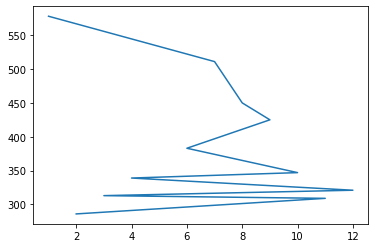

In [130]:
year_filtrado["Month_Date"].value_counts().plot()

<AxesSubplot:>

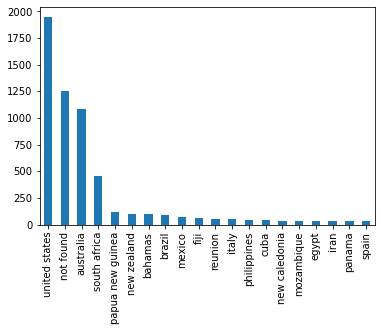

In [157]:
df["Country"].value_counts().nlargest(20).plot.bar()

In [153]:
df["Country"].info()

<class 'pandas.core.series.Series'>
Int64Index: 6302 entries, 0 to 6301
Series name: Country
Non-Null Count  Dtype 
--------------  ----- 
6297 non-null   object
dtypes: object(1)
memory usage: 98.5+ KB


In [154]:
pd.set_option('display.max_rows', 10)

In [160]:
"""


import country_converter as coco

df["Country"] = coco.convert(names=df["Country"], to='name_short')
df["Country"]=df["Country"].str.lower()
df["Country"].value_counts()

"""


'\n\n\nimport country_converter as coco\n\ndf["Country"] = coco.convert(names=df["Country"], to=\'name_short\')\ndf["Country"]=df["Country"].str.lower()\ndf["Country"].value_counts()\n\n'

In [165]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Sex', 'Age', 'Fatal (Y/N)', 'Time', 'original order',
       'Age_normalize', 'Date_normalize', 'Year_Date', 'Month_Date',
       'Day_Date'],
      dtype='object')

<AxesSubplot:>

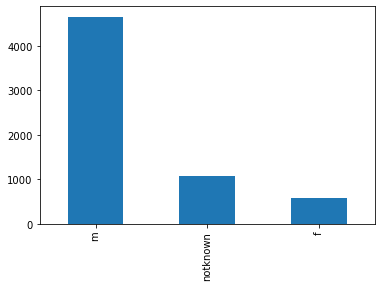

In [159]:
df.Sex.value_counts().plot(kind='bar')

<AxesSubplot:>

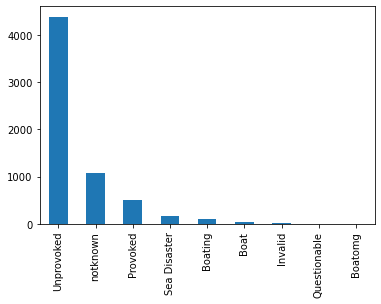

In [163]:
df.Type.value_counts().plot(kind='bar')

NameError: name 'plt' is not defined

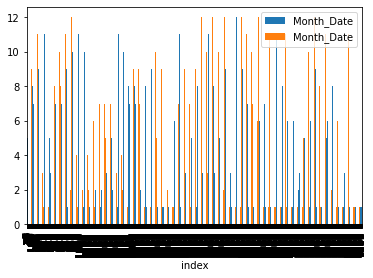

In [167]:
df.reset_index().plot(
    x="index", y=["Month_Date", "Month_Date"], kind="bar"
)
plt.title("Mince Pie Consumption 18/19")
plt.xlabel("Family Member")
plt.ylabel("Pies Consumed")

In [171]:
df["Year_Date"].nunique()

209

In [172]:
df.columns


Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Sex', 'Age', 'Fatal (Y/N)', 'Time', 'original order',
       'Age_normalize', 'Date_normalize', 'Year_Date', 'Month_Date',
       'Day_Date'],
      dtype='object')

In [186]:
sexo_muertes = df[['Sex','Fatal (Y/N)']]

In [187]:
sexo_muertes.value_counts(['Sex','Fatal (Y/N)'])

Sex       Fatal (Y/N)
m         n              3482
          y              1173
notknown  notknown       1072
f         n               468
          y               107
dtype: int64

In [188]:
sexo_muertes.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            6292, 6293, 6294, 6295, 6296, 6297, 6298, 6299, 6300, 6301],
           dtype='int64', length=6302)

In [184]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Sex', 'Age', 'Fatal (Y/N)', 'Time', 'original order',
       'Age_normalize', 'Date_normalize', 'Year_Date', 'Month_Date',
       'Day_Date'],
      dtype='object')

Text(0, 0.5, 'Cantidad')

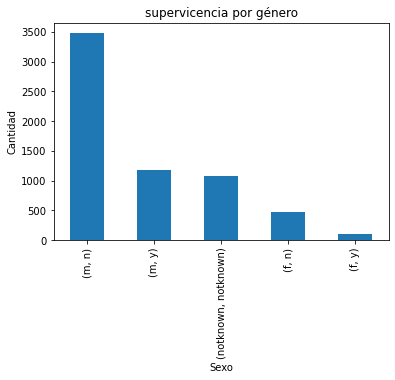

In [205]:
from matplotlib import pyplot as plt
plotdata = sexo_muertes.value_counts(['Sex','Fatal (Y/N)'])

plotdata.plot(kind="bar")
plt.title("supervicencia por género")
plt.xlabel("Sexo")
plt.ylabel("Cantidad")

KeyError: '[False] not in index'

In [207]:
Mujeres = df[df['Sex'] == "f"]

In [210]:
df.value_counts("Sex")

Sex
m           4655
notknown    1072
f            575
dtype: int64

In [211]:
Mujeres.value_counts('Fatal (Y/N)')

Fatal (Y/N)
n    468
y    107
dtype: int64

In [212]:
Hombres = df[df['Sex'] == "m"]

In [213]:
df.value_counts("Sex")

Sex
m           4655
notknown    1072
f            575
dtype: int64

In [214]:
Hombres.value_counts('Fatal (Y/N)')

Fatal (Y/N)
n    3482
y    1173
dtype: int64

Text(0, 0.5, 'Cantidad')

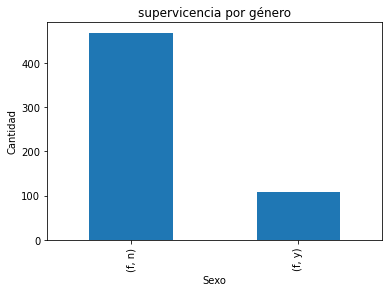

In [209]:
from matplotlib import pyplot as plt
plotdata = Mujeres.value_counts(['Sex','Fatal (Y/N)'])



plotdata.plot(kind="bar")
plt.title("supervicencia por género")
plt.xlabel("Sexo")
plt.ylabel("Cantidad")

0

In [ ]:
from matplotlib import pyplot as plt
plotdata = sexo_muertes.value_counts(['Sex','Fatal (Y/N)'])

plotdata.plot(kind="bar")
plt.title("supervicencia por género")
plt.xlabel("Sexo")
plt.ylabel("Cantidad")

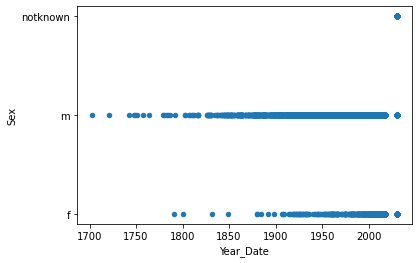

In [221]:
"""
df = pd.DataFrame([[5.1, 3.5, 0], [4.9, 3.0, 0], [7.0, 3.2, 1],

                   [6.4, 3.2, 1], [5.9, 3.0, 2]],

                  columns=['length', 'width', 'species'])
"""
ax1 = df.plot.scatter(x='Year_Date',

                      y='Sex',

                     c='DarkBlue')

In [225]:
"""
df = pd.DataFrame([[5.1, 3.5, 0], [4.9, 3.0, 0], [7.0, 3.2, 1],

                   [6.4, 3.2, 1], [5.9, 3.0, 2]],

                  columns=['length', 'width', 'species'])
"""
bx1 = df.plot.scatter(x='Year_Date',

                      y='Age_normalize',

                     c='DarkBlue'
                     s=400)

SyntaxError: invalid syntax (2600923550.py, line 13)